In [239]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

1. Найти ближайшую ортогональную матрицу (в смысле нормы Фробениуса) к матрице <br>
A = $$\begin{pmatrix}
0.5&2.16506351& 0.4330127 \\
−0.8660254& 1.25& 0.25\\
0& 0.5 &2.5
\end{pmatrix}$$

<br> Посмотрев на результат, найти соответствующие этому преобразованию угол и 
направление поворота. Матрицу, угол и направление поворота распечатать в
stdout.

In [240]:
A = np.array([[0.5, 2.16506351, 0.4330127], [-0.8660254, 1.25, 0.25], [0, 0.5, 2.5]])

# Найдем SVD разложение матрицы
U, S, Vt = np.linalg.svd(A)

# Найдем ортогональную матрицу
B = U @ Vt
B = np.around(B, 2)

## Вывод
print("Матрица обратная A:")
B

Матрица обратная A:


array([[ 0.5 ,  0.87, -0.  ],
       [-0.87,  0.5 ,  0.  ],
       [ 0.  ,  0.  ,  1.  ]])

Угол вращения = arccos(В[0][0]) = 60° <br>
Из того, что $В[1][0] < 0$ Можно сделать вывод, что происходит вращение против частовой стрелки в правой СК

2. При помощи SVD найти обратную матрицу к квадратной матрице nxn, 
состоящей из элементов <br>
$A_{ij}$ = $\frac{1}{i+j-1}$
<br>для размеров матрицы n=3 и n=10. Результат распечатать в stdout.
<br>
$A = USV^{T}$
<br>
$A^{-1} = VS^{-1}U^{T}$

In [241]:
def get_matrix(n):
    matrix = []
    for i in range(1, n+1):
        vector = []
        for j in range(1, n+1):
            vector.append(1.0/float(i+j-1))
        matrix.append(vector)
    return np.array(matrix)

def SVD_inv(matrix):
    U, S, Vt = np.linalg.svd(matrix)
    S_rev = np.zeros(matrix.shape)
    n, _ = matrix.shape
    for i in range(n):
        S_rev[i][i] = S[i]
    S_rev = LA.inv(S_rev)
    V = Vt.transpose()
    Ut = U.transpose()
    A_reverse = np.matmul(np.matmul(V, S_rev), Ut)
    return A_reverse
    

In [242]:
n = 3
A = get_matrix(n)
A_rev = SVD_inv(A)

In [243]:
A = np.around(A, 2)
A

array([[1.  , 0.5 , 0.33],
       [0.5 , 0.33, 0.25],
       [0.33, 0.25, 0.2 ]])

In [244]:
A_rev = np.around(A_rev, 2)
A_rev

array([[   9.,  -36.,   30.],
       [ -36.,  192., -180.],
       [  30., -180.,  180.]])

In [245]:
n = 10
A = get_matrix(n)
A_rev = SVD_inv(A)

In [246]:
A = np.around(A, 2)
A

array([[1.  , 0.5 , 0.33, 0.25, 0.2 , 0.17, 0.14, 0.12, 0.11, 0.1 ],
       [0.5 , 0.33, 0.25, 0.2 , 0.17, 0.14, 0.12, 0.11, 0.1 , 0.09],
       [0.33, 0.25, 0.2 , 0.17, 0.14, 0.12, 0.11, 0.1 , 0.09, 0.08],
       [0.25, 0.2 , 0.17, 0.14, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.08],
       [0.2 , 0.17, 0.14, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.08, 0.07],
       [0.17, 0.14, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.08, 0.07, 0.07],
       [0.14, 0.12, 0.11, 0.1 , 0.09, 0.08, 0.08, 0.07, 0.07, 0.06],
       [0.12, 0.11, 0.1 , 0.09, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06],
       [0.11, 0.1 , 0.09, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.06],
       [0.1 , 0.09, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.06, 0.05]])

In [247]:
A_rev = np.around(A_rev, 2)
A_rev

array([[ 1.00000000e+02, -4.94982000e+03,  7.91961600e+04,
        -6.00565060e+05,  2.52235330e+06, -6.30584162e+06,
         9.60884782e+06, -8.75087303e+06,  4.37541833e+06,
        -9.23696060e+05],
       [-4.94982000e+03,  3.26684360e+05, -5.88026669e+06,
         4.75644893e+07, -2.08093443e+08,  5.35094857e+08,
        -8.32366396e+08,  7.70077792e+08, -3.89850703e+08,
         8.31329266e+07],
       [ 7.91961300e+04, -5.88026569e+06,  1.12900399e+08,
        -9.51285668e+08,  4.28076808e+09, -1.12369780e+10,
         1.77571488e+10, -1.66336963e+10,  8.50584923e+09,
        -1.82892917e+09],
       [-6.00564730e+05,  4.75644731e+07, -9.51285516e+08,
         8.24444710e+09, -3.78728258e+10,  1.00993973e+11,
        -1.61590045e+11,  1.52895709e+11, -7.88367367e+10,
         1.70700412e+10],
       [ 2.52235142e+06, -2.08093339e+08,  4.28076678e+09,
        -3.78728206e+10,  1.76739544e+11, -4.77196125e+11,
         7.71225177e+11, -7.35811050e+11,  3.82055410e+11,
        -8.

3. Для квадратной матрицы nxn, состоящей из элементов <br>
$A_{ij}$ = i + j - 1
<br>найти с использованием SVD все решения уравнений AX=0 для n=4 Результат 
распечатать в stdout.

In [248]:
def get_matrix(n):
    matrix = []
    for i in range(1, n+1):
        vector = []
        for j in range(1, n+1):
            vector.append(i+j-1)
        matrix.append(vector)
    return np.array(matrix)

In [249]:
A = get_matrix(4)
U, S, Vt = np.linalg.svd(A)
X = Vt[abs(S) < 1e-3]
X

array([[ 0.30408826, -0.06590039, -0.780464  ,  0.54227613],
       [-0.45555497,  0.83406063, -0.30145636, -0.0770493 ]])

4. Написать программу, находящую все точки пересечения двух прямых на 
плоскости методом однородных координат. Прямые заданы уравнениями ax+by+c
= 0, cx+dy+e=0. Коэффициенты задать константами на ваше усмотрение. Результат 
распечатать в stdout.

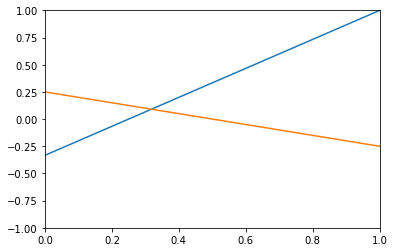

In [250]:
A = np.array([[4, -3, 1], [2, 4,  1]])

x = np.linspace(0, 1, 100)
y0 = (A[0][2] - x * A[0][0]) / A[0][1]
y1 = (A[1][2] - x * A[1][0]) / A[1][1]

plt.plot(x, y0)
plt.plot(x, y1)
plt.xlim(-0, 1)
plt.ylim(-1, 1)
pass

In [251]:
p = np.cross(A[0], A[1])
p = p / p[2]
p = p[:2]
p = p * -1
p

array([0.31818182, 0.09090909])

5. Необязательная задача (15 баллов) Найти матрицу `B` ранга `r` (для любого значения `r`),     
ближайшую (в смысле нормы Фробениуса) к заданной квадратной матрице `А` (использовать `SVD`).

Рекомендованные функции: `cv2.SVDecomp` или `numpy.linalg.svd`, `numpy.matmul`, 
`numpy.divide`, `numpy.squeeze`